In [53]:
import numpy as np

import pandas as pd

import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Activation, Dropout

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt

import itertools

In [54]:
def plotConfusionMatrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.bewaxis]
    thresh = cm.max()/2
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predict label')

In [55]:
samples = np.load("data/olivetti_faces.npy")
labels = np.load("data/olivetti_faces_target.npy")


In [56]:
img_rows, img_cols = 64, 64

if backend.image_data_format() == 'channels_first':
    samples = samples.reshape(samples.shape[0],1,img_rows, img_cols)
    input_shape=(1,img_rows, img_cols)
else:
    samples = samples.reshape(samples.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
labels = keras.utils.to_categorical(labels, 40)

xTrain, xTest, yTrain, yTest = train_test_split(samples, labels, test_size=0.2)


In [57]:
model = Sequential()

In [58]:
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(40, activation='softmax'))

In [59]:
model.summary()
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 62, 62, 64)        640       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 40)                501800    
Total params: 539,368
Trainable params: 539,368
Non-trainable params: 0
________________________________________________

In [60]:
history = model.fit(xTrain, yTrain, batch_size=32, epochs=100, validation_data=(xTest, yTest))

Train on 320 samples, validate on 80 samples
Epoch 1/100
320/320 [==============================] - 2s 6ms/step - loss: 3.7377 - accuracy: 0.0344 - val_loss: 3.6873 - val_accuracy: 0.0250
Epoch 2/100
320/320 [==============================] - 2s 5ms/step - loss: 3.6720 - accuracy: 0.0562 - val_loss: 3.6999 - val_accuracy: 0.0625
Epoch 3/100
320/320 [==============================] - 2s 5ms/step - loss: 3.5865 - accuracy: 0.1063 - val_loss: 3.6405 - val_accuracy: 0.1250
Epoch 4/100
320/320 [==============================] - 2s 5ms/step - loss: 3.3971 - accuracy: 0.3063 - val_loss: 3.4052 - val_accuracy: 0.1625
Epoch 5/100
320/320 [==============================] - 3s 9ms/step - loss: 2.9127 - accuracy: 0.4938 - val_loss: 2.6920 - val_accuracy: 0.5625
Epoch 6/100
320/320 [==============================] - 2s 6ms/step - loss: 1.9678 - accuracy: 0.7781 - val_loss: 1.6236 - val_accuracy: 0.8125
Epoch 7/100
320/320 [==============================] - 2s 6ms/step - loss: 0.9575 - accuracy: 0.8

320/320 [==============================] - 2s 6ms/step - loss: 7.9081e-04 - accuracy: 1.0000 - val_loss: 0.0810 - val_accuracy: 0.9625
Epoch 58/100
320/320 [==============================] - 2s 6ms/step - loss: 7.5775e-04 - accuracy: 1.0000 - val_loss: 0.0823 - val_accuracy: 0.9625
Epoch 59/100
320/320 [==============================] - 2s 6ms/step - loss: 7.3704e-04 - accuracy: 1.0000 - val_loss: 0.0832 - val_accuracy: 0.9625
Epoch 60/100
320/320 [==============================] - 2s 6ms/step - loss: 7.1596e-04 - accuracy: 1.0000 - val_loss: 0.0824 - val_accuracy: 0.9625
Epoch 61/100
320/320 [==============================] - 2s 6ms/step - loss: 6.9984e-04 - accuracy: 1.0000 - val_loss: 0.0815 - val_accuracy: 0.9625
Epoch 62/100
320/320 [==============================] - 2s 6ms/step - loss: 6.8026e-04 - accuracy: 1.0000 - val_loss: 0.0826 - val_accuracy: 0.9625
Epoch 63/100
320/320 [==============================] - 2s 6ms/step - loss: 6.5385e-04 - accuracy: 1.0000 - val_loss: 0.0806 

400/400 [==============================] - 1s 1ms/step


/home/pedro/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/pedro/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/pedro/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/pedro/.local/lib/python3.6/site-packages/pandas

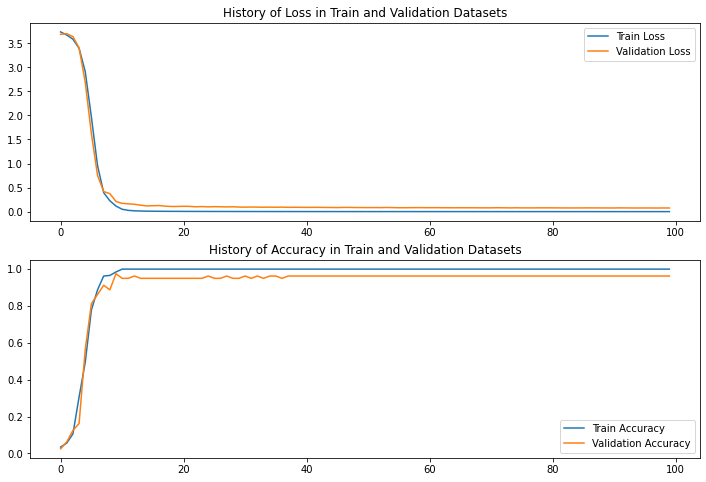

In [61]:
accuracy = model.evaluate(samples, labels)
mhistory = pd.DataFrame()
mhistory['Train Loss'] = history.history['loss']
mhistory['Validation Loss'] = history.history['val_loss']
mhistory['Train Accuracy'] = history.history['accuracy']
mhistory['Validation Accuracy'] = history.history['val_accuracy']

fig, axarr = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
axarr[0].set_title("History of Loss in Train and Validation Datasets")
mhistory[["Train Loss", "Validation Loss"]].plot(ax=axarr[0])
axarr[1].set_title("History of Accuracy in Train and Validation Datasets")
mhistory[["Train Accuracy", "Validation Accuracy"]].plot(ax=axarr[1])
plt.show()

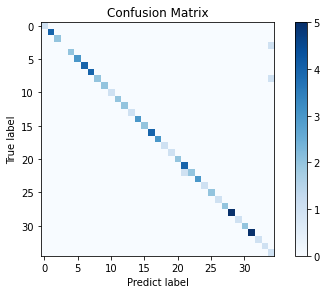

In [62]:
testLables = [str(i) for i in range(0, 40)]
predictions = model.predict(xTrain, batch_size=10, verbose=0)
rPredictions = model.predict_classes(xTest, batch_size=10, verbose=0)
rLabels = np.argmax(yTest, axis=1)
confusionMatrix = confusion_matrix(rLabels, rPredictions)
plotConfusionMatrix(confusionMatrix, testLables)

In [63]:
model = Sequential()

In [64]:
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(40, activation='softmax'))

In [65]:
model.summary()
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 62, 62, 64)        640       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 12544)            

In [66]:
history = model.fit(xTrain, yTrain, batch_size=32, epochs=100, validation_data=(xTest, yTest))

Train on 320 samples, validate on 80 samples
Epoch 1/100
320/320 [==============================] - 2s 8ms/step - loss: 3.8254 - accuracy: 0.0188 - val_loss: 3.6894 - val_accuracy: 0.0000e+00
Epoch 2/100
320/320 [==============================] - 2s 6ms/step - loss: 3.6832 - accuracy: 0.0219 - val_loss: 3.6898 - val_accuracy: 0.0000e+00
Epoch 3/100
320/320 [==============================] - 2s 6ms/step - loss: 3.6816 - accuracy: 0.0406 - val_loss: 3.6934 - val_accuracy: 0.0000e+00
Epoch 4/100
320/320 [==============================] - 2s 7ms/step - loss: 3.6765 - accuracy: 0.0281 - val_loss: 3.7198 - val_accuracy: 0.0000e+00
Epoch 5/100
320/320 [==============================] - 2s 6ms/step - loss: 3.6443 - accuracy: 0.0375 - val_loss: 3.6994 - val_accuracy: 0.0000e+00
Epoch 6/100
320/320 [==============================] - 2s 6ms/step - loss: 3.5921 - accuracy: 0.0594 - val_loss: 3.6593 - val_accuracy: 0.0625
Epoch 7/100
320/320 [==============================] - 2s 7ms/step - loss: 3.

320/320 [==============================] - 2s 6ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0636 - val_accuracy: 0.9875
Epoch 58/100
320/320 [==============================] - 2s 5ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0641 - val_accuracy: 0.9875
Epoch 59/100
320/320 [==============================] - 2s 7ms/step - loss: 0.0122 - accuracy: 0.9969 - val_loss: 0.0675 - val_accuracy: 0.9875
Epoch 60/100
320/320 [==============================] - 2s 7ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0688 - val_accuracy: 0.9875
Epoch 61/100
320/320 [==============================] - 2s 7ms/step - loss: 0.0062 - accuracy: 0.9969 - val_loss: 0.0651 - val_accuracy: 0.9875
Epoch 62/100
320/320 [==============================] - 2s 7ms/step - loss: 0.0057 - accuracy: 0.9969 - val_loss: 0.1128 - val_accuracy: 0.9750
Epoch 63/100
320/320 [==============================] - 2s 5ms/step - loss: 0.0172 - accuracy: 0.9969 - val_loss: 0.2020 - val_accuracy: 0.9250
Epoch

400/400 [==============================] - 0s 1ms/step


/home/pedro/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/pedro/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/pedro/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/pedro/.local/lib/python3.6/site-packages/pandas

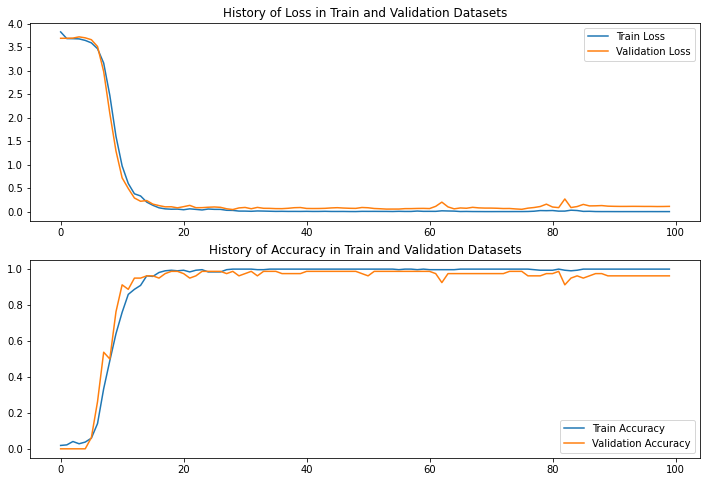

In [67]:
accuracy = model.evaluate(samples, labels)
mhistory = pd.DataFrame()
mhistory['Train Loss'] = history.history['loss']
mhistory['Validation Loss'] = history.history['val_loss']
mhistory['Train Accuracy'] = history.history['accuracy']
mhistory['Validation Accuracy'] = history.history['val_accuracy']

fig, axarr = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
axarr[0].set_title("History of Loss in Train and Validation Datasets")
mhistory[["Train Loss", "Validation Loss"]].plot(ax=axarr[0])
axarr[1].set_title("History of Accuracy in Train and Validation Datasets")
mhistory[["Train Accuracy", "Validation Accuracy"]].plot(ax=axarr[1])
plt.show()

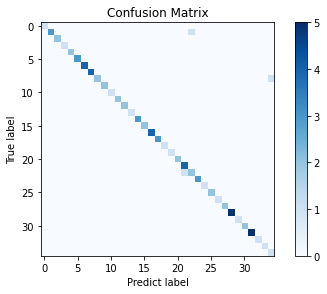

In [68]:
testLables = [str(i) for i in range(0, 40)]
predictions = model.predict(xTrain, batch_size=10, verbose=0)
rPredictions = model.predict_classes(xTest, batch_size=10, verbose=0)
rLabels = np.argmax(yTest, axis=1)
confusionMatrix = confusion_matrix(rLabels, rPredictions)
plotConfusionMatrix(confusionMatrix, testLables)

In [69]:
model = Sequential()

In [70]:
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(40,  activation='softmax'))

In [71]:
model.summary()
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 62, 62, 32)        320       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 14, 14, 64)       

In [72]:
history = model.fit(xTrain, yTrain, batch_size=32, epochs=100, validation_data=(xTest, yTest))

Train on 320 samples, validate on 80 samples
Epoch 1/100
320/320 [==============================] - 3s 10ms/step - loss: 3.7167 - accuracy: 0.0188 - val_loss: 3.6919 - val_accuracy: 0.0250
Epoch 2/100
320/320 [==============================] - 3s 9ms/step - loss: 3.6859 - accuracy: 0.0281 - val_loss: 3.6964 - val_accuracy: 0.0000e+00
Epoch 3/100
320/320 [==============================] - 3s 9ms/step - loss: 3.6845 - accuracy: 0.0344 - val_loss: 3.7085 - val_accuracy: 0.0000e+00
Epoch 4/100
320/320 [==============================] - 3s 10ms/step - loss: 3.6791 - accuracy: 0.0219 - val_loss: 3.7086 - val_accuracy: 0.0000e+00
Epoch 5/100
320/320 [==============================] - 3s 10ms/step - loss: 3.6787 - accuracy: 0.0437 - val_loss: 3.7133 - val_accuracy: 0.0000e+00
Epoch 6/100
320/320 [==============================] - 3s 9ms/step - loss: 3.6778 - accuracy: 0.0250 - val_loss: 3.7062 - val_accuracy: 0.0000e+00
Epoch 7/100
320/320 [==============================] - 3s 9ms/step - loss:

320/320 [==============================] - 3s 9ms/step - loss: 0.0434 - accuracy: 0.9906 - val_loss: 0.1176 - val_accuracy: 0.9500
Epoch 58/100
320/320 [==============================] - 3s 9ms/step - loss: 0.0307 - accuracy: 0.9906 - val_loss: 0.1077 - val_accuracy: 0.9625
Epoch 59/100
320/320 [==============================] - 3s 9ms/step - loss: 0.0216 - accuracy: 0.9937 - val_loss: 0.0869 - val_accuracy: 0.9750
Epoch 60/100
320/320 [==============================] - 3s 9ms/step - loss: 0.0261 - accuracy: 0.9906 - val_loss: 0.0958 - val_accuracy: 0.9500
Epoch 61/100
320/320 [==============================] - 3s 9ms/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.0898 - val_accuracy: 0.9625
Epoch 62/100
320/320 [==============================] - 3s 9ms/step - loss: 0.0279 - accuracy: 0.9875 - val_loss: 0.0798 - val_accuracy: 0.9375
Epoch 63/100
320/320 [==============================] - 3s 9ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.0947 - val_accuracy: 0.9500
Epoch

400/400 [==============================] - 1s 2ms/step


/home/pedro/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/pedro/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/pedro/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/pedro/.local/lib/python3.6/site-packages/pandas

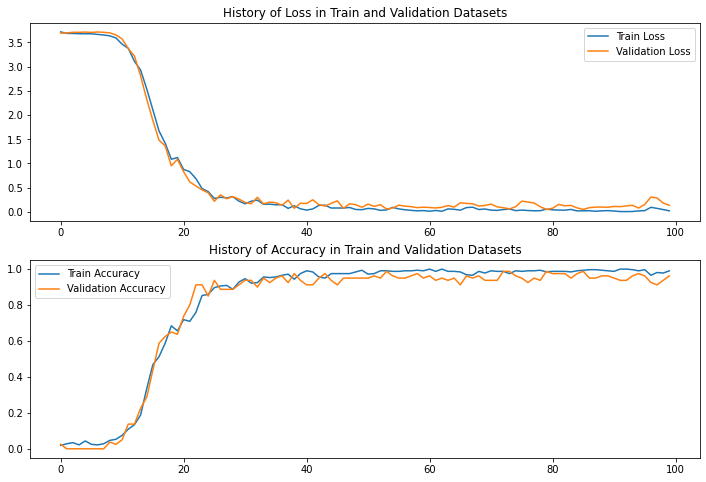

In [73]:
accuracy = model.evaluate(samples, labels)
mhistory = pd.DataFrame()
mhistory['Train Loss'] = history.history['loss']
mhistory['Validation Loss'] = history.history['val_loss']
mhistory['Train Accuracy'] = history.history['accuracy']
mhistory['Validation Accuracy'] = history.history['val_accuracy']

fig, axarr = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
axarr[0].set_title("History of Loss in Train and Validation Datasets")
mhistory[["Train Loss", "Validation Loss"]].plot(ax=axarr[0])
axarr[1].set_title("History of Accuracy in Train and Validation Datasets")
mhistory[["Train Accuracy", "Validation Accuracy"]].plot(ax=axarr[1])
plt.show()

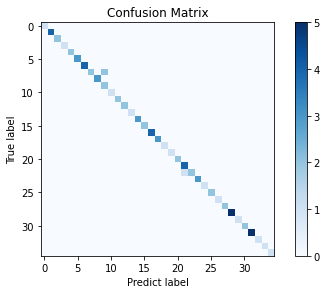

In [74]:
testLables = [str(i) for i in range(0, 40)]
predictions = model.predict(xTrain, batch_size=10, verbose=0)
rPredictions = model.predict_classes(xTest, batch_size=10, verbose=0)
rLabels = np.argmax(yTest, axis=1)
confusionMatrix = confusion_matrix(rLabels, rPredictions)
plotConfusionMatrix(confusionMatrix, testLables)